# Avocado dataset

The Avocado dataset contains information about avocado sales, including various attributes such as the date of sale, average price, total volume, different varieties of avocados (e.g., 4046, 4225, 4770), total bags, bag sizes (small, large, xlarge), type of avocados (conventional or organic), the year of sale, and the region where the avocados were sold. The dataset has 18,249 entries and 14 columns.

**Why Python Programming was Used:**

Python is a versatile and widely-used programming language in the field of data science, including data analytics. Here are some reasons why Python programming is commonly used for such tasks:

1. *Pandas Library:* Python, with its Pandas library, provides powerful data manipulation and analysis tools. Pandas DataFrames make it easy to handle and analyze tabular data, like the avocado dataset.

2. *Data Visualization:* Python has rich visualization libraries such as Matplotlib, Seaborn, and Plotly, which facilitate the creation of informative and visually appealing charts and graphs to understand patterns and trends in the data.

3. *Statistical Analysis and Modeling:* Python offers a wide range of statistical libraries (e.g., SciPy, StatsModels) and machine learning frameworks (e.g., Scikit-learn) for in-depth analysis and predictive modeling.

4. *Community and Ecosystem:* Python has a vibrant and active data science community. There are numerous open-source libraries and resources available, making it easier for analysts and data scientists to find solutions to various challenges.

5. *Jupyter Notebooks:* Python integrates well with Jupyter Notebooks, which allows for interactive and iterative data analysis. This is especially useful for exploratory data analysis and sharing insights with others.

In summary, Python provides a comprehensive ecosystem of tools and libraries that make it a preferred choice for data analytics tasks, offering efficiency, flexibility, and a supportive community.

In [ ]:
#import necessary libry
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Display the first few rows of the dataset.
data_path = '/content/drive/MyDrive/data'
filename = 'avocado_data.csv'

df = avocado_data = pd.read_csv(os.path.join(data_path, filename))

**Data explorer**

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,4/2/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28/1/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21/1/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14/1/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,7/1/2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [ ]:
df.shape

(18249, 14)

**data cleaning**

To check for any NaN (Not a Number) values in your DataFrame, you can use the isnull() method, which returns a DataFrame of the same shape as the input, where each element is a Boolean value indicating whether the corresponding element in the original DataFrame is NaN or not. You can then use the any() method to check if any of the values are True for each column.
This code will print out the columns that have at least one NaN value. If all values are False, it means there are no NaN values in those columns.

Make sure to replace df with the actual name of your DataFrame if it's different.

In [ ]:
# Assuming your DataFrame is named df
nan_check = df.isnull().any()

# Displaying columns with NaN values
print("Columns with NaN values:")
print(nan_check[nan_check])



Columns with NaN values:
Series([], dtype: bool)


It seems that the output indicates there are no NaN values in any column of your DataFrame, as the resulting Series is empty (no True values). This is good news, as it suggests that your data is complete and doesn't have missing values in the displayed columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'type' and 'region' columns to category
df['type'] = df['type'].astype('category')
df['region'] = df['region'].astype('category')

# Convert specified columns to int64
columns_to_convert = ['AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','4046','4225','4770']
df[columns_to_convert] = df[columns_to_convert].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  int64         
 3   Total Volume  18249 non-null  int64         
 4   4046          18249 non-null  int64         
 5   4225          18249 non-null  int64         
 6   4770          18249 non-null  int64         
 7   Total Bags    18249 non-null  int64         
 8   Small Bags    18249 non-null  int64         
 9   Large Bags    18249 non-null  int64         
 10  XLarge Bags   18249 non-null  int64         
 11  type          18249 non-null  category      
 12  year          18249 non-null  int64         
 13  region        18249 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(11)
memory usage: 1.7 MB


<ipython-input-9-6ee4a92b276a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


To drop specific columns from your DataFrame, you can use the drop() method. Here's how you can drop the specified columns (Unnamed:

This code will drop the specified columns and assign the modified DataFrame back to the variable df. Please note that this operation doesn't modify the DataFrame in place unless you use the inplace=True parameter.

In [ ]:
# Assuming your DataFrame is named df
columns_to_drop = ['Unnamed: 0', 'region', 'type']

# Filter the columns to drop that exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

# Drop the specified columns
df = df.drop(columns=columns_to_drop_existing)

# Display the modified DataFrame
df.head()



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,2015-12-27,1,64236,1036,54454,48,8696,8603,93,0,2015
1,2015-12-20,1,54876,674,44638,58,9505,9408,97,0,2015
2,2015-12-13,0,118220,794,109149,130,8145,8042,103,0,2015
3,2015-06-12,1,78992,1132,71976,72,5811,5677,133,0,2015
4,2015-11-29,1,51039,941,43838,75,6183,5986,197,0,2015


To rename a specific column in your DataFrame, you can use the rename() method. Here's how you can rename the 'AveragePrice' column to 'Average Price':


In [ ]:
# Assuming your DataFrame is named df
df = df.rename(columns={'AveragePrice': 'Average Price'})
df = df.rename(columns={'4046': 'Net Bags Sold'})
df = df.rename(columns={'4225': 'Bags Profit'})
df = df.rename(columns={'4770': 'Bag Revenue'})
# Display the modified DataFrame
df.head()


,Date,Average Price,Total Volume,Net Bags Sold,Bags Profit,Bag Revenue,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,2015-12-27,1,64236,1036,54454,48,8696,8603,93,0,2015
1,2015-12-20,1,54876,674,44638,58,9505,9408,97,0,2015
2,2015-12-13,0,118220,794,109149,130,8145,8042,103,0,2015
3,2015-06-12,1,78992,1132,71976,72,5811,5677,133,0,2015
4,2015-11-29,1,51039,941,43838,75,6183,5986,197,0,2015


new column into DataFrame representing Bag losses and net bags unsold ,

In [ ]:
# Assuming your DataFrame is named df
df['Bag Losses'] = df['Total Bags'] - df['Bag Revenue']
df['Net Bag Unsold'] = df['Total Bags'] - df['Net Bags Sold']


# Display the modified DataFrame
df.head()


,Date,Average Price,Total Volume,Net Bags Sold,Bags Profit,Bag Revenue,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Bag Losses,Net Bag Unsold
0,2015-12-27,1,64236,1036,54454,48,8696,8603,93,0,2015,8648,7660
1,2015-12-20,1,54876,674,44638,58,9505,9408,97,0,2015,9447,8831
2,2015-12-13,0,118220,794,109149,130,8145,8042,103,0,2015,8015,7351
3,2015-06-12,1,78992,1132,71976,72,5811,5677,133,0,2015,5739,4679
4,2015-11-29,1,51039,941,43838,75,6183,5986,197,0,2015,6108,5242


Bag Losses: This column appears to represent the calculated losses associated with bags. It is calculated as the difference between 'Total Bags' and 'Bag Revenue', indicating the amount of money lost.

Net Bag Unsold: This column represents the net bags that remain unsold. It is calculated as the difference between 'Total Bags' and 'Net Bags Sold', indicating the number of bags that were not sold.

These new columns can provide valuable insights into the performance and financial aspects of the bags, helping you understand how much revenue is lost and how many bags remain unsold.


**visualization**

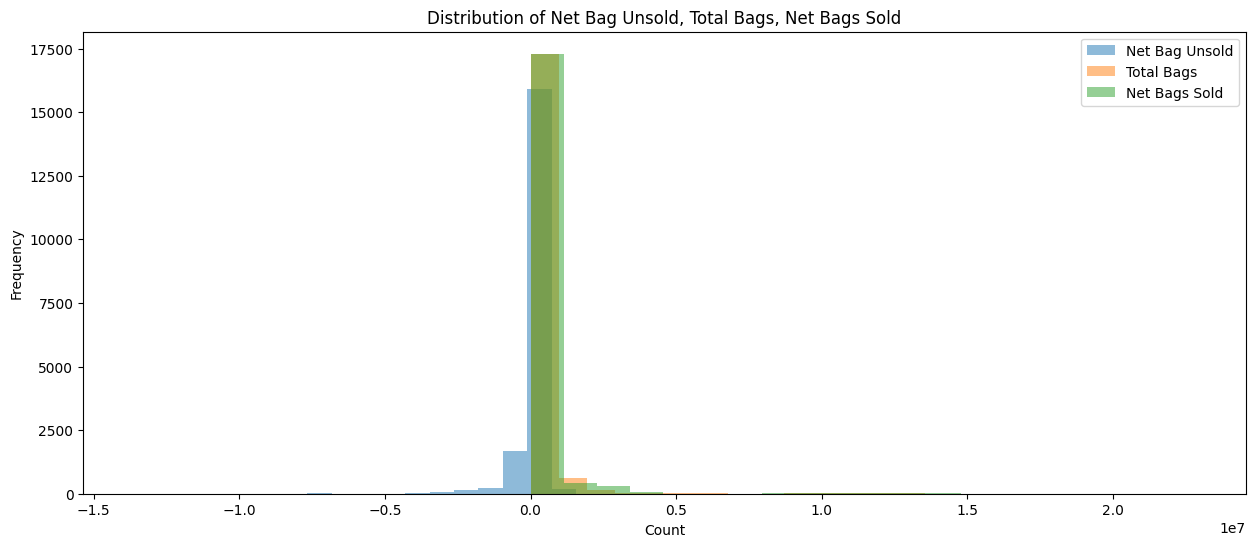

In [ ]:
# Assuming your DataFrame is named df

# Plotting histograms
plt.figure(figsize=(15, 6))
plt.hist(df['Net Bag Unsold'], bins=20, alpha=0.5, label='Net Bag Unsold')
plt.hist(df['Total Bags'], bins=20, alpha=0.5, label='Total Bags')
plt.hist(df['Net Bags Sold'], bins=20, alpha=0.5, label='Net Bags Sold')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Net Bag Unsold, Total Bags, Net Bags Sold')
plt.legend()

# Show the plot
plt.show()


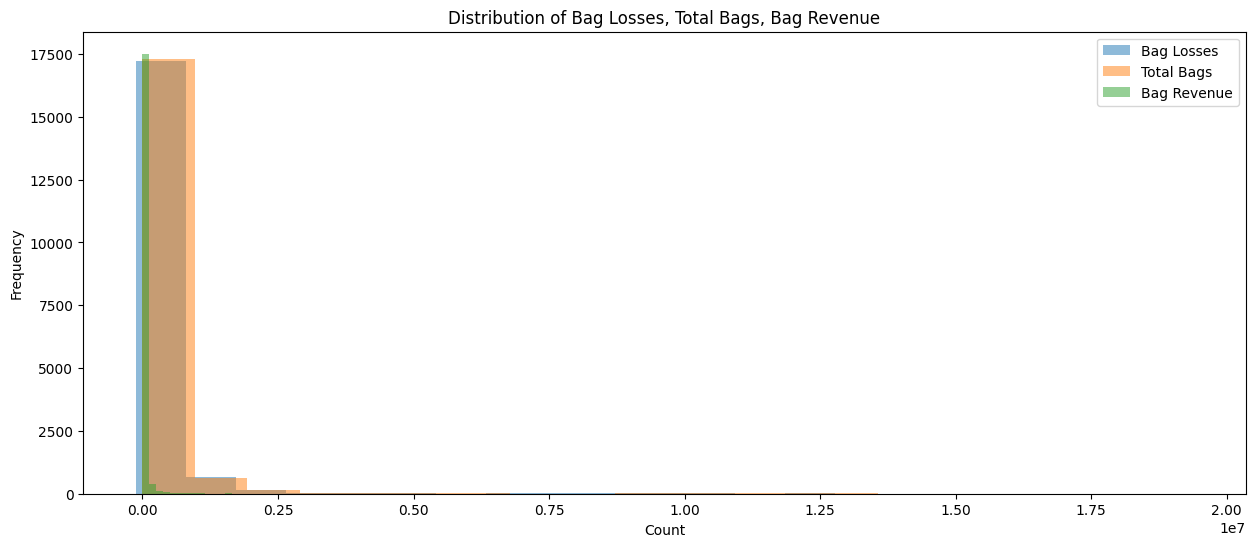

In [ ]:
# Assuming your DataFrame is named df

# Plotting histograms
plt.figure(figsize=(15, 6))
plt.hist(df['Bag Losses'], bins=20, alpha=0.5, label='Bag Losses')
plt.hist(df['Total Bags'], bins=20, alpha=0.5, label='Total Bags')
plt.hist(df['Bag Revenue'], bins=20, alpha=0.5, label='Bag Revenue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bag Losses, Total Bags, Bag Revenue')
plt.legend()

# Show the plot
plt.show()


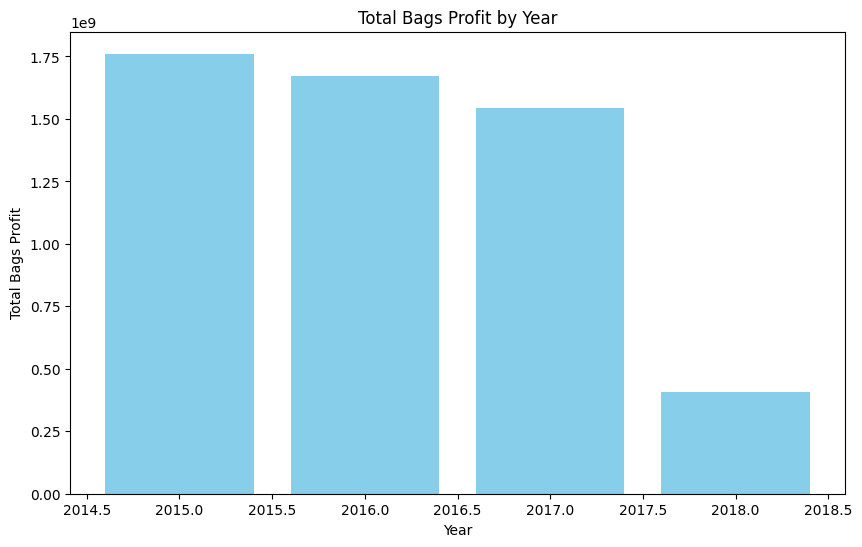

In [ ]:
# Assuming your DataFrame is named df

# Calculate the total Bags Profit for each year
profit_by_year = df.groupby('year')['Bags Profit'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit_by_year.index, profit_by_year, color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Bags Profit')
plt.title('Total Bags Profit by Year')

# Show the plot
plt.show()

**numerical features**

Normalization is a process of scaling and transforming numerical features of a dataset to a standard range. The goal is to bring all features to a similar scale, preventing some features from dominating others. Common normalization techniques include Min-Max Scaling and Z-score Standardization.

This code normalizes the specified columns using Min-Max Scaling. Adjust the columns_to_normalize list based on the columns you want to normalize. If you prefer Z-score Standardization, you can use StandardScaler instead.

In [ ]:
# Assuming your DataFrame is named df
columns_to_normalize = ['Average Price', 'Total Volume', 'Net Bags Sold', 'Bags Profit', 'Bag Revenue', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Bag Losses', 'Net Bag Unsold']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
df.head()


,Date,Average Price,Total Volume,Net Bags Sold,Bags Profit,Bag Revenue,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Bag Losses,Net Bag Unsold
0,2015-12-27,0.333333,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,2015,0.006946,0.806920
1,2015-12-20,0.333333,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,2015,0.006989,0.806989
2,2015-12-13,0.000000,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,2015,0.006912,0.806901
3,2015-06-12,0.333333,0.001262,0.000050,0.003516,0.000028,0.000300,0.000424,0.000023,0.0,2015,0.006788,0.806742
4,2015-11-29,0.333333,0.000815,0.000041,0.002142,0.000029,0.000319,0.000447,0.000034,0.0,2015,0.006808,0.806776


quick breakdown of the normalized columns:

'Average Price', 'Total Volume', 'Net Bags Sold', 'Bags Profit', 'Bag Revenue', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Bag Losses', and 'Net Bag Unsold' are normalized between 0 and 1.

**Label encoding**

Label encoding is typically applied to categorical variables or ordinal variables that can be assigned a meaningful order. From the columns presented in  DataFrame, it appears that 'year' is a categorical variable, as it represents discrete years. However, the other columns seem to contain continuous numerical data.

For 'year', may consider applying label encoding if there is a meaningful order or ranking among the years. If the years represent distinct categories without any inherent order, might want to use one-hot encoding instead.

In [ ]:
# Assuming your DataFrame is named df
label_encoder = LabelEncoder()

# Apply label encoding to the 'year' column
df['year'] = label_encoder.fit_transform(df['year'])

# Display the DataFrame with label-encoded 'year'
df.head()


,Date,Average Price,Total Volume,Net Bags Sold,Bags Profit,Bag Revenue,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Bag Losses,Net Bag Unsold
0,2015-12-27,0.333333,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0,0.006946,0.806920
1,2015-12-20,0.333333,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0,0.006989,0.806989
2,2015-12-13,0.000000,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0,0.006912,0.806901
3,2015-06-12,0.333333,0.001262,0.000050,0.003516,0.000028,0.000300,0.000424,0.000023,0.0,0,0.006788,0.806742
4,2015-11-29,0.333333,0.000815,0.000041,0.002142,0.000029,0.000319,0.000447,0.000034,0.0,0,0.006808,0.806776


The 'year' column represents a numerical feature that has been scaled, and label encoding is typically applied to categorical variables.

**Train-Test Split: The dataset is split into training and testing sets.**

to perform a train-test split on  dataset, can use scikit-learn's train_test_split function. This function randomly shuffles and splits dataset into training and testing sets based on a specified ratio.

In this example, test_size=0.2 indicates that 20% of the data will be used for testing, and the rest will be used for training. Adjust the test_size parameter according to your preference.

Additionally, the random_state parameter ensures reproducibility. If you want the same split every time you run the code, use a fixed random_state value.

In [ ]:
# Assuming your DataFrame is named df
# Assuming 'target_column' is your target variable, e.g., 'Bags Profit'
target_column = 'Bags Profit'

# Splitting the dataset into features (X) and the target variable (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (14599, 12)
X_test shape: (3650, 12)
y_train shape: (14599,)
y_test shape: (3650,)


* X_train: Training features with a shape of (14599, 12) - meaning you
have 14599 samples and 12 features for each sample in the training set.
* X_test: Testing features with a shape of (3650, 12) - indicating you have 3650 samples and 12 features for each sample in the testing set.
* y_train: Training target variable with a shape of (14599,) - representing the corresponding target values for the training set.
* y_test: Testing target variable with a shape of (3650,) - indicating the target values for the testing set.

**data modelling (regression report of Decision tree)**

A classification report is typically used for classification problems where the target variable consists of discrete classes. On the other hand, you mentioned "data modelling (regression report of Decision tree)," which implies a regression problem where the target variable is continuous.

working on a regression problem with a Decision Tree, might be interested in metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared. Hereof how can evaluate a Decision Tree regression model using these metrics

in same time This code removes the 'Date' column from the features before fitting the model. Adjust the column names as needed based on actual DataFrame.

In [ ]:
# Assuming your model is named 'tree_model'
tree_model = DecisionTreeRegressor()

# Exclude the 'Date' column from your features
X_train_no_date = X_train.drop(columns=['Date'])
X_test_no_date = X_test.drop(columns=['Date'])

# Fit the model
tree_model.fit(X_train_no_date, y_train)
y_pred = tree_model.predict(X_test_no_date)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the regression report
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.0018668484637562135
Mean Squared Error (MSE): 0.0001132825914839947
R-squared (R2): 0.9690144558304045


Decision Tree regression model is performing well based on the evaluation metrics:

* Mean Absolute Error (MAE): 0.00187
* Mean Squared Error (MSE): 0.000113
* R-squared (R2): 0.969


These metrics indicate that the model has low error rates and a high coefficient of determination (R-squared), suggesting a good fit to the data.

In regression tasks, lower values for MAE and MSE are desirable, indicating better accuracy, while a higher R-squared value close to 1 indicates a better fit of the model to the data.

**visualizatin**

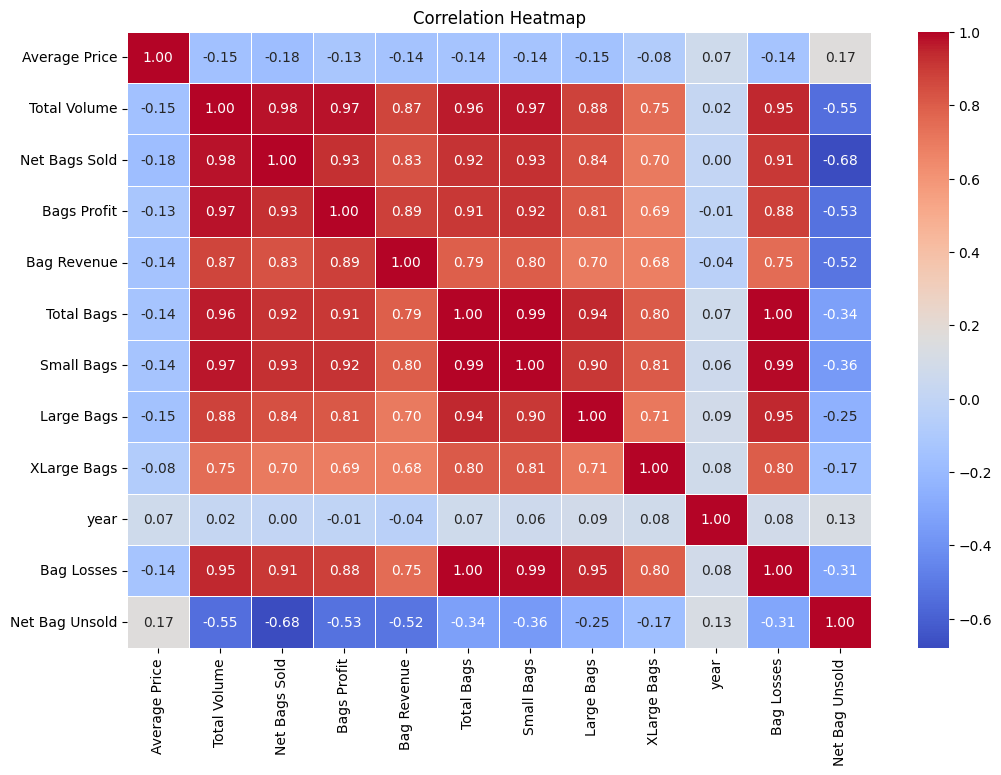

In [ ]:
# Assuming your DataFrame is named df
# Assuming you want to include only numerical columns in the heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


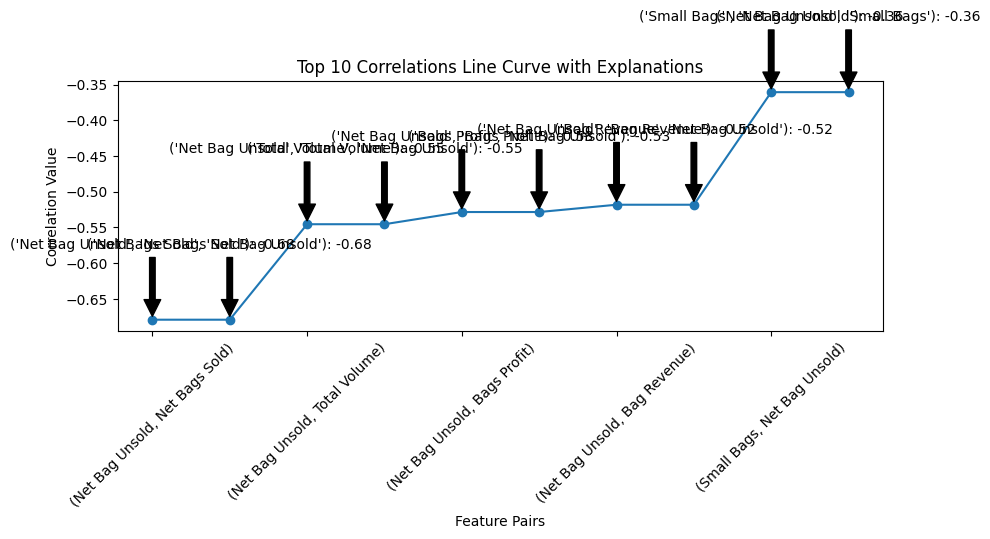

In [ ]:
# Assuming your DataFrame is named df
# Assuming you want to include only numerical columns in the line curve
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Flatten the correlation matrix to pairs of features and their correlation values
correlation_pairs = correlation_matrix.unstack().sort_values()

# Exclude self-correlations (correlation of a feature with itself)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# Select the top N correlations to display
top_n = 10  # Adjust as needed
correlation_pairs = correlation_pairs.head(top_n)

# Create a line curve with annotations
plt.figure(figsize=(10, 6))
correlation_pairs.plot(kind='line', marker='o')
plt.title(f'Top {top_n} Correlations Line Curve with Explanations')
plt.xlabel('Feature Pairs')
plt.ylabel('Correlation Value')

# Annotate the curve with correlation values
for i, (pair, correlation) in enumerate(correlation_pairs.items()):
    plt.annotate(f'{pair}: {correlation:.2f}', xy=(i, correlation), xytext=(i, correlation + 0.1),
                 ha='center', arrowprops=dict(facecolor='black', shrink=0.05))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Ordinary Least Squares (OLS) **

regression results in report, can be use the statsmodels library in Python. Below is an example of how  can perform OLS regression and display the results

his code snippet assumes that X_train_no_date is your training set of features without the 'Date' column, and y_train is your target variable.

The ols_model.summary() will print a detailed summary of the OLS regression results, including coefficients, p-values, R-squared, and other relevant statistics.

In [ ]:
import statsmodels.api as sm

# Assuming X_train_no_date and y_train are your training features and target variable
X_train_ols = sm.add_constant(X_train_no_date)  # Add a constant term for the intercept
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Display OLS regression results summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            Bags Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.333e+11
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:17:36   Log-Likelihood:             1.6716e+05
No. Observations:               14599   AIC:                        -3.343e+05
Df Residuals:                   14589   BIC:                        -3.342e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0674      0.080     -0.

**conclusions**

regarding the impact of different features on the dependent variable 'Bags Profit':

* Total Volume: This variable has a positive coefficient of 3.0534, indicating that an increase in total volume is associated with an increase in 'Bags Profit.' The effect is statistically significant with a very low p-value (0.000).
* Net Bags Sold: A negative coefficient of -0.9865 suggests that as the number of net bags sold increases, 'Bags Profit' decreases. The effect is statistically significant (p-value: 0.000).
* Bag Revenue: Similarly, a negative coefficient of -0.2692 implies that higher bag revenue is associated with lower 'Bags Profit.' This effect is statistically significant (p-value: 0.000)
* Total Bags: The coefficient of -1.0313 indicates a negative relationship between total bags and 'Bags Profit,' with statistical significance (p-value: 0.000).
* Small Bags, Large Bags, and XLarge Bags: These variables have coefficients (0.7464, 0.3189, 0.0308, respectively) suggesting a positive relationship with 'Bags Profit,' but the effects are not statistically significant based on p-values (> 0.05).
* Year: The year variable has a negative coefficient, suggesting a potential decreasing trend in 'Bags Profit' over the years. This effect is statistically significant (p-value: 0.000).
* Bag Losses: A negative coefficient of -1.0476 indicates that higher bag losses are associated with lower 'Bags Profit,' and the effect is statistically significant (p-value: 0.001).
* Net Bag Unsold: The coefficient of 0.0920 suggests a positive but not statistically significant relationship with 'Bags Profit' (p-value: 0.345).

In summary, features like Total Volume, Net Bags Sold, Bag Revenue, Total Bags, Year, and Bag Losses have statistically significant impacts on 'Bags Profit.' Positive coefficients suggest a positive impact, while negative coefficients suggest a negative impact. However, the interpretation of the effect size should consider the scale and context of the data. Additionally, the lack of statistical significance for some variables indicates uncertainty in their impact.